1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

In [5]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from scipy.fftpack import fft, ifft, rfft, fftfreq, fft2, ifft2
import copy

In [10]:
x = 15
mu = 6.3
sigma = mu**.5
Z = np.abs(x-6.3)/sigma

print(f'The Z score is Z = {Z}')

pVal = 1 - stats.norm.cdf(Z)
alpha = 1 - stats.norm.cdf(3)

if pVal < alpha:
    print(f'The p-value {pVal} is less than alpha {alpha} so we reject the null hypothesis and the event of 15 is statistically significant')
else: 
    print(f'The p-value {pVal} is more than alpha {alpha} so we accept the null hypothesis and the event of 15 is statistically insignificant')

The Z score is Z = 3.4661629670697414
The p-value 0.00026397158691493505 is less than alpha 0.0013498980316301035 so we reject the null hypothesis and the event of 15 is statistically significant


2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

In [14]:
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])

n, var1, var2 = len(pre), 0, 0
avg1, avg2 = np.average(pre), np.average(post)
for i in range(n):
    var1 += (pre[i] - avg1)**2
    var2 += (post[i] - avg2)**2
    
var1/=(n-1)
var2/=(n-1)

sigma = ((var1 + var2)/2)**0.5

T = (avg1 - avg2)/(sigma*(2/n)**0.5)
pVal = stats.t.cdf(T, len(pre)-1)

print(f'T = {T}, and p-value = {pVal}')
print(f'Using a significance level of {0.05}, the p-value is less than alpha so we can reject the null hypothesis and conclude that changes in blood pressure are statistically insignificant.')

T = -3.786997938137629, and p-value = 0.002151232066432296
Using a significance level of 0.05, the p-value is less than alpha so we can reject the null hypothesis and conclude that changes in blood pressure are statistically insignificant.


3\. **FFT of a simple dataset**

Perform a periodicity analysis on the lynxs-hares population, i.e. determine what is the period of the population of these animals.

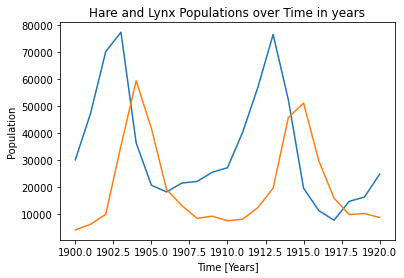

In [8]:
data = pd.read_csv('populations.txt', sep='	')

hares = np.array(data['hare'])
lynxes = np.array(data['lynx'])

# Plot
plt.plot(data['# year'], hares, label='Hare')
plt.plot(data['# year'], lynxes, label='Lynx')
plt.title('Hare and Lynx Populations over Time in years')
plt.xlabel('Time [Years]')
plt.ylabel('Population')
plt.legend
plt.show()

<ipython-input-12-d1f4a60e4390>:12: RuntimeWarning: divide by zero encountered in true_divide
  period = 1/freq


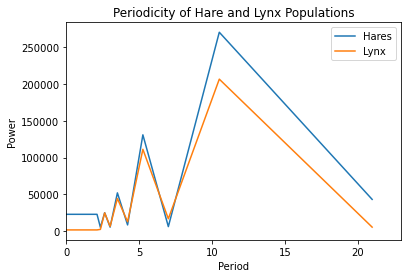

In [12]:
# FFT data and get signals
hareSig = fft(hares)
lynxSig = fft(lynxes)

# power
harePow = np.abs(hareSig)
lynxPow = np.abs(lynxSig)

# frequencies
windowLen, sampleSpacing = data.shape[0], data['# year'][1] - data['# year'][0]
freq = fftfreq(windowLen, sampleSpacing)
period = 1/freq

# Plot
plt.plot(period, harePow, label='Hares')
plt.plot(period, lynxPow, label='Lynx')
plt.title('Periodicity of Hare and Lynx Populations')
plt.xlabel('Period')
plt.ylabel('Power')
plt.xlim(0, 23)
plt.legend()
plt.show()

4\. **FFT of an image**

Write a filter that removes the periodic noise from the `moonlanding.png` image by using a 2-dimensional FFT.

* Import the image as a 2D numpy array using `plt.imread("moonlanding.png")`. Examine the image with `plt.imshow()`, which is heavily contaminated with periodic noise.
* Check the documentation of the `scipy.fftpack` package, and find the method that performs a 2D FFT. Plot the spectrum (Fourier transform of) the image. **Hint**: use `LogNorm` to plot the colors in log scale:
```Python
from matplotlib.colors import LogNorm
plt.imshow(image, norm=LogNorm(vmin=5))
```
* Inspect the spectrum, and try to locate the regions of the power spectrum that contain the signal and those which contain the periodic noise. Use array slicing to set the noise regions to zero.
* Apply the inverse Fourier transform to plot the resulting image.

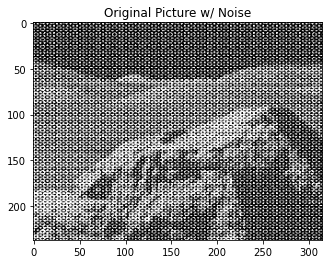

In [21]:
# Load in and visualize original image
im = plt.imread("moonlanding.png")
plt.imshow(im, plt.cm.gray)
plt.title('Original Picture w/ Noise')
plt.show()

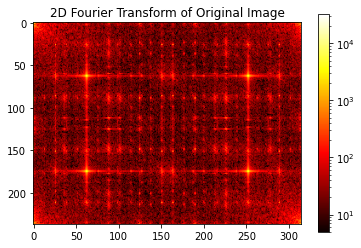

In [26]:
# Fourier transform image and visualize
image = fft2(im)
plt.imshow(np.abs(image), norm=LogNorm(vmin=5), cmap='hot')
plt.title('2D Fourier Transform of Original Image')
plt.colorbar()
plt.show()

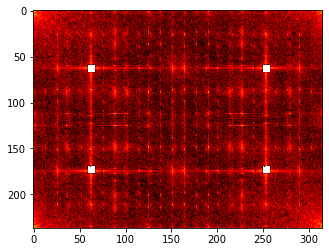

In [68]:
# The signal of image seems to be primarilly in four spots: left-top of center, left-bottom
# of center, right-top of center, and right-bottom of center

# Helper function for determining if position is near one of the 4 points
def nearPoint(i, j):
    # Rough estimates of positions of points
    points = [(63, 63), (173, 63), (63, 253), (173, 253)]
    
    #check if near
    for point in points:
        if ((abs(i-point[0])) < 5 and (abs(j-point[1])) < 5):
            #print(f'(i,j): {(i,j)} and point[0,1]: {point[0],point[1]}')
            return False
    
    # Else return False
    return True
    

#Create filter array
row, col = image.shape
filtered = copy.deepcopy(image)

# Set all points in filtered array not near the 4 points to 0
for i in range(row):
    for j in range(col):
        if (nearPoint(i, j) == False):
            filtered[i,j] = 0
            
plt.imshow(np.abs(filtered), norm=LogNorm(vmin=5), cmap='hot')
plt.show()

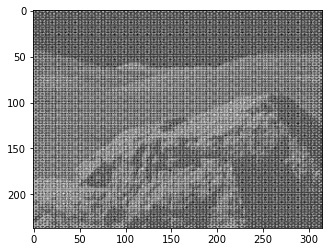

In [69]:
# Plot inverse Fourier transform
result = ifft2(filtered).real
plt.imshow(result, cmap='gray')
plt.show()